<a href="https://colab.research.google.com/github/fatemesima/Online-Hierarchical-Clustering/blob/main/OnlineRandomCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy.linalg import norm
from scipy.spatial.distance import cosine
from sklearn import datasets
import matplotlib.pyplot as plt
import random
from tabulate import tabulate
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import datasets , decomposition
import collections
from random import sample
from google.colab import files
import io
import time

In [ ]:
import math
def distd(x,y):
    dis = 0
    d = len(x)
    for i in range(d):
        dis += (x[i]-y[i])**2
    return math.sqrt(dis)


def diameter(s):
    diam = 0
    for x in s:
        for y in s:
            dis = distd(x,y)
            if diam < dis:
                diam = dis
    return diam



#dist when x and y is 1d
def dist(x,y):
    dis = abs(x-y)
    return dis

In [ ]:
####DataSETS


###iris
# iris = datasets.load_iris()
# data= iris.data
# X = iris.data[:, :4]

###mnist
# url = 'https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/MNIST.csv'
# df1 = pd.read_csv(url)
# X = df1.to_numpy()

###glass

# url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
# df1 = pd.read_csv(url)
# # Dataset is now stored in a Pandas Dataframe
# df1.drop('1', inplace=True, axis=1)
# df1.to_numpy()
# X = np.vstack([df1, [ 1.52101 , 13.64 , 4.49 , 1.10 , 71.78 , 0.06, 8.75, 0.00, 0.00]])


###zoo
# url = 'https://raw.githubusercontent.com/sharmaroshan/Zoo-Dataset/master/zoo.csv'
# data = pd.read_csv(url)
# data.drop('animal_name', inplace=True, axis=1)
# X= data.to_numpy()


###r15
!wget https://cs.joensuu.fi/sipu/datasets/R15.txt
example1 = "R15.txt"
from numpy.core.multiarray import datetime_data
data=[]
import re
import numpy as np
from ast import literal_eval
with open(example1, "r") as file1:
    for line in file1:
      s=re.sub("[\t]", "," , line)
      s.strip("\n")
      data.append(s.rstrip("\n"))
X = np.array([literal_eval(x) for x in data])
X = np.delete(X,-1,axis=1)



####Pathbased
# !wget https://cs.joensuu.fi/sipu/datasets/pathbased.txt
# example1 = "pathbased.txt"
# from numpy.core.multiarray import datetime_data
# data=[]
# import re
# import numpy as np
# from ast import literal_eval
# with open(example1, "r") as file1:
#     for line in file1:
#       s=re.sub("[\t]", "," , line)
#       s.strip("\n")
#       data.append(s.rstrip("\n"))
# X = np.array([literal_eval(x) for x in data])
# X = np.delete(X,-1,axis=1)

####AGG
# !wget https://cs.joensuu.fi/sipu/datasets/Aggregation.txt
# example1 = "Aggregation.txt"
# from numpy.core.multiarray import datetime_data
# data=[]
# import re
# import numpy as np
# from ast import literal_eval
# with open(example1, "r") as file1:
#     for line in file1:
#       s=re.sub("[\t]", "," , line)
#       s.strip("\n")
#       data.append(s.rstrip("\n"))
# X = np.array([literal_eval(x) for x in data])
# X = np.delete(X,-1,axis=1)

# #project
(u,v) = np.shape(X)
g =np.random.normal(0, 1, size=(v, 1))
c= np.dot(X,g)
Y = c.ravel().tolist()


#Euclidean distance similarity
# diam = diameter(X)

# def simfunc(x,y):
#     return (diam - distd(x,y))/diam



#Gaussian kernel similarity
def simfunc(x,z,sigma=5):
  return np.exp((-(np.linalg.norm(x-z)**2))/(2*sigma**2))

N = len(X)
SIM = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        SIM[i,j] = simfunc(X[i],X[j])

--2023-09-02 01:03:14--  https://cs.joensuu.fi/sipu/datasets/R15.txt
Resolving cs.joensuu.fi (cs.joensuu.fi)... 193.167.239.10
Connecting to cs.joensuu.fi (cs.joensuu.fi)|193.167.239.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9548 (9.3K) [text/plain]
Saving to: ‘R15.txt’

R15.txt             100%[===================>]   9.32K  --.-KB/s    in 0s      

2023-09-02 01:03:15 (195 MB/s) - ‘R15.txt’ saved [9548/9548]



In [ ]:
from itertools import combinations
def find_max_upper(X):
  N= len(X)
  idx = list(range(N))
  L =[]
  for triplet in combinations(idx ,3):
    l=[]
    for j in combinations(list(triplet),2):
        l.append(SIM[j[0]][j[1]])
    L.append(max(l))
  sumi=0
  for l in L:
    sumi += l
  del l
  del L
  up = (sumi*2)/(N*(N-1))
  return up

In [ ]:
import sys
print(sys.getrecursionlimit())

1000


In [ ]:
sys.setrecursionlimit(3000)

In [ ]:
m = find_max_upper(X)

In [ ]:
def frac( x , maxupper):
  r = (100*x)/maxupper
  return r

In [ ]:
class Node:
    def __init__(self, val):
        self.parent = None
        self.left = None
        self.right = None
        self.element = val

    def __iter__(self):
        if self.left:
            yield from self.left

        yield int(self.element)

        yield self.parent

        if self.right:
            yield from self.right



    def display(self):
            lines, *_ = self._display_aux()
            for line in lines:
                print(line)

    def _display_aux(self):
            """Returns list of strings, width, height, and horizontal coordinate of the root."""
            # No child.
            if self.right is None and self.left is None:
                line = '%s' % self.element
                width = len(line)
                height = 1
                middle = width // 2
                return [line], width, height, middle

            # Only left child.
            if self.right is None:
                lines, n, p, x = self.left._display_aux()
                s = '%s' % self.element
                u = len(s)
                first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s
                second_line = x * ' ' + '/' + (n - x - 1 + u) * ' '
                shifted_lines = [line + u * ' ' for line in lines]
                return [first_line, second_line] + shifted_lines, n + u, p + 2, n + u // 2

            # Only right child.
            if self.left is None:
                lines, n, p, x = self.right._display_aux()
                s = '%s' % self.element
                u = len(s)
                first_line = s + x * '_' + (n - x) * ' '
                second_line = (u + x) * ' ' + '\\' + (n - x - 1) * ' '
                shifted_lines = [u * ' ' + line for line in lines]
                return [first_line, second_line] + shifted_lines, n + u, p + 2, u // 2

            # Two children.
            left, n, p, x = self.left._display_aux()
            right, m, q, y = self.right._display_aux()
            s = '%s' % self.element
            u = len(s)
            first_line = (x + 1) * ' ' + (n - x - 1) * '_' + s + y * '_' + (m - y) * ' '
            second_line = x * ' ' + '/' + (n - x - 1 + u + y) * ' ' + '\\' + (m - y - 1) * ' '
            if p < q:
                left += [n * ' '] * (q - p)
            elif q < p:
                right += [m * ' '] * (p - q)
            zipped_lines = zip(left, right)
            lines = [first_line, second_line] + [a + u * ' ' + b for a, b in zipped_lines]
            return lines, n + m + u, max(p, q) + 2, n + u // 2



In [ ]:
class BinaryTree:
    def __init__(self):
        self.root = None

    def getRoot(self):
        return self.root

    def addroot(self,val):
        if self.root is not None:
           print("Tree is not empty!")
        else:
           self.root = Node(val)

    def addleft(self,p, val):
        if (p is None):
            print("Empty Reference!")
            return
        if(p.left is not None):
            print("Left child is already present!")
            return
        else:
            p.left = Node(val)
            return p.left

    def addright(self,p, val):
        if (p is None):
            print("Empty Reference!")
            return
        if (p.right is not None):
            print("Right child is already present!")
            return
        else:
            p.right = Node(val)
            return p.right

    def is_leaf(self, p):
        if (p!=None and p.left==None and p.right==None):
            return True
        else:
            return False

    def deleteTree(self):
        self.root = None

    def inOrder(self):
        if(self.root is not None):
            self._inOrder(self.root)

    def _inOrder(self, node):
        if(node is not None):
            self._inOrder(node.left)
            print(str(node.element) + ' ',end='')
            self._inOrder(node.right)

    def get_leaves(self):
        L = []
        if(self.root is not None):
            self._get_leaves(self.root, L)
        return L

    def _get_leaves(self, node, L):
        if(node is not None):
            self._get_leaves(node.left, L)
            if self.is_leaf(node):
                L.append(node.element)
            self._get_leaves(node.right, L)

    def subtreecopy(self, node):

        if node is None:
            return node
        else:
            p = Node(node.element)
            p.left = self.subtreecopy(node.left)
            p.right = self.subtreecopy(node.right)
            return p

    def MWrev(self):
        if (self.root is not None):
            return self._MWrev(self.root)
        else: return 0


    def _MWrev(self, node):
        N= len(self.get_leaves())
        if (node is not None):
            ab = 0
            LA = []
            self._get_leaves(node.left, LA)
            LB = []
            self._get_leaves(node.right, LB)
            for x in LA:
                for y in LB:
                    ab += SIM[x,y]*(N-len(LA)-len(LB))
            la = self._MWrev(node.left)
            lb = self._MWrev(node.right)
            return la + lb + ab

        else:
            return 0



    def __iter__(self):
        if self.root is not None:
            yield from self.root

    def display(self):
        if self.root is not None:
            self.root.display()

    def findparent(self , root , node , parent=None ) :
      if root is not None:
        if (root.element==node.element):
          return parent
        else:
          if node.element[1] <= root.element[1]:
            return self.findparent(root.left,node,root)
          else:
            return self.findparent(root.right,node,root)

    def where_Ins_rc(self,n,p):
      if (n is not None):
        if p<= n.element[1]:
          if self.is_leaf(n.left):
            return n
          elif min(n.left.element[0]) <= p and p <= max(n.left.element[0]):
              return self.where_Ins_rc(n.left,p)
          else:
            return n
        else:
          if self.is_leaf(n.right):
            return n
          elif min(n.right.element[0]) <= p and p <= max(n.right.element[0]):
              return self.where_Ins_rc(n.right , p)
          else:
            return n

        #if self.is_leaf(node):
          #parent = self.findparent(self.root,node,-1)
          #return parent


In [ ]:
def delete(node):
  if node is not None:
    delete(node.left)
    delete(node.right)
    node.left=node.right=None
    del node


In [ ]:
def Merge(T1,T2,r): ## merge two binary trees
#'%s'%(r)
    r = Node(r)
    T = BinaryTree()
    T.root = r
    T.root.left = T1.root
    T.root.right = T2.root

    return T

In [ ]:
def leftsubtree(t):
  T = BinaryTree()
  node = t.subtreecopy(t.root.left)
  T.root = node
  return T

def rightsubtree(t):
  T = BinaryTree()
  node = t.subtreecopy(t.root.right)
  T.root = node
  return T

In [ ]:
cut=0
#X is base dataset
#Y is projected of X
#YL is label of datas which is input of randomcut

def randomcut(YL,tree=BinaryTree()):

  if len(YL)==1:
    t= BinaryTree()
    tree = Merge(tree,t,YL[0])
    return tree

  mini = Y[YL[0]]
  for i in YL:
    if Y[i] < mini:
      mini = Y[i]

  maxi = Y[YL[0]]
  for j in YL:
    if Y[j] > maxi:
      maxi = Y[j]

  if mini == maxi:
    n = len(YL)
    if (n % 2) == 0:
      m = n/2
    else:
      m = (n+1)/2
    first_half = YL[:int(m)]
    sec_half=YL[int(m):]
    tree = Merge(randomcut(first_half,tree),randomcut(sec_half,tree),[YL,mini])
    return tree

  r  = random.uniform(mini ,maxi)
  X_plus=[]
  X_mines=[]
  for x in YL:
    if Y[x] > r:
      X_plus.append(x)
    else:
      X_mines.append(x)


  tree = Merge(randomcut(X_mines,tree),randomcut(X_plus,tree),[YL,r])


  global cut
  cut += 1
  return tree


In [ ]:
def prc(M):
  n = len(Y)
  idx = list(range( M))
  t = randomcut(idx,tree=BinaryTree())
  return t

In [ ]:
tt = prc()

In [ ]:
rev = tt.MWrev()
print('MW = ',rev)
print('MW (normalized) = ',(rev*2)/(N*(N-1)))

MW =  57146.224771558635
MW (normalized) =  0.03541303358329128


In [ ]:
timprc=[]
for m in range(1,600,50):
  start = time.time()
  prc(m)
  end = time.time()
  timprc.append(end-start)


In [ ]:
def _OnlineRC(t,new):
    if t.getRoot() == None :
      t.addroot(new)
      return t
    L = t.get_leaves()
    if len(L)==1:
      L.append(new)
      t = randomcut(L)
      return t

    min = Y[L[0]]
    for i in L:
      if Y[i] < min:
        min = Y[i]

    max= Y[L[0]]
    for j in L:
      if Y[j] > max :
        max = Y[i]

    if Y[new] < min or Y[new] > max :
      L.append(new)
      t = randomcut(L)
      return t


    elif min<= Y[new] and max>= Y[new]:
      root = t.getRoot()
      if Y[new] <= root.element[1]:
        t.root.left = _OnlineRC(leftsubtree(t),new).root
      else:
        t.root.right = _OnlineRC(rightsubtree(t),new).root
      return t


In [ ]:
def onlineRC_main(M):
   tree = BinaryTree()
   n = len(Y)
   idx = list(range(M))
   for i in idx:
    tree = _OnlineRC(tree,i)
   return tree

In [ ]:
t = onlineRC_main()

In [ ]:
timorc=[]
for m in range(1,600,50):
  start = time.time()
  onlineRC_main(m)
  end = time.time()
  timorc.append(end-start)


In [ ]:
timrct =[1.9073486328125e-05, 0.06008124351501465, 0.13349699974060059, 0.2681722640991211, 0.3717360496520996, 0.37290048599243164, 0.5801141262054443, 0.8240096569061279, 0.7956094741821289, 0.9760394096374512, 1.2663302421569824, 2.1878538131713867]

In [ ]:
timotd = [1.5735626220703125e-05, 0.009739875793457031, 0.02636265754699707, 0.05525612831115723, 0.11187505722045898]

In [ ]:
!pip install python-bidi
!pip install arabic-reshaper

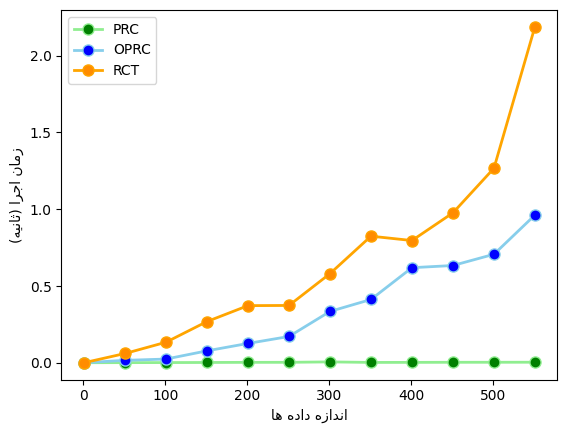

In [ ]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
df2 = pd.DataFrame({'data size':range(1,600,50),'PRC':timprc ,'OPRC':timorc , 'RCT':timrct })
plt.plot('data size','PRC',data = df2 , marker = 'o', markerfacecolor = 'green', markersize=8, color= 'lightgreen', linewidth=2)
plt.plot('data size','OPRC',data = df2 , marker = 'o', markerfacecolor = 'blue', markersize=8, color= 'skyblue', linewidth=2)
plt.plot('data size','RCT',data = df2 , marker = 'o', markerfacecolor = 'darkorange', markersize=8, color= 'orange', linewidth=2)
#plt.plot('data size','OTD',data = df2 , marker = 'o', markerfacecolor = 'red', markersize=8, color= 'lightcoral', linewidth=2)
plt.xlabel(get_display(reshape('اندازه داده ها')))
plt.ylabel(get_display(reshape('زمان اجرا (ثانیه)')))
plt.legend()
plt.show()

In [ ]:
# npoints2 = np.array([])
# cutpoints2 = np.array([])
# for n in range(100,1100)[::100]:
#   cut=0
#   np.random.seed(1)
#   df = pd.DataFrame({"C" : np.random.randint(low=1, high=100, size=n),
#                      "D"  : np.random.normal(0.0, 1.0, size=n)
#                      })
#   numn_list = df[df.columns[0]].values.tolist()
#   normal_list= df[df.columns[1]].values.tolist()
#   tree=BinaryTree()
#   for j in normal_list:
#     tree = _OnlineRC(tree,j)
#   npoints2 = np.append(npoints2,n)
#   cutpoints2 =np.append(cutpoints2,cut)



In [ ]:
# npoints = np.array([])
# cutpoints = np.array([])
# for n in range(1000,10000)[::1000]:
#   cut=0
#   np.random.seed(1)
#   df = pd.DataFrame({"C" : np.random.randint(low=1, high=100, size=n),
#                      "D"  : np.random.normal(0.0, 1.0, size=n)
#                      })
#   numn_list = df[df.columns[0]].values.tolist()
#   normal_list= df[df.columns[1]].values.tolist()
#   tree=BinaryTree()
#   for j in normal_list:
#     tree = _OnlineRC(tree,j)
#   npoints= np.append(npoints2,n)
#   cutpoints =np.append(cutpoints2,cut)


In [ ]:
# plt.plot(npoints2, cutpoints2)
# plt.xlabel('n', fontsize = 15)
# plt.ylabel('number of cuts', fontsize = 15)
# plt.show()

In [ ]:
# mydata=[]
# npoints = np.array([])
# cutpoints = np.array([])
# for n in range(100,1000)[::100]:
#   cut=0
#   randomList=[]
#   for i in range(n):
#     r=round(random.uniform(0,100),2)
#     if r not in randomList:
#       randomList.append(r)
#   tree = BinaryTree()
#   for j in randomList:
#     tree = _OnlineRC(tree,j)
#   mydata.append([n,cut])
#   npoints = np.append(npoints,n)
#   cutpoints=np.append(cutpoints,cut)

In [ ]:
# plt.plot(npoints, cutpoints)
# plt.xlabel('n', fontsize = 15)
# plt.ylabel('number of cuts', fontsize = 15)
# plt.show()

In [ ]:
# sum=0
# for i in range(11):
#   tree_iris = randomcut(project_iris)
#   rev=tree_iris.MWrev()
#   norm=(rev*2)/(149*(149-1))
#   sum += norm
# print(sum)
# print('MW averaged over 10 runs= ',sum/10)

In [ ]:
# tree_iris = randomcut(X)
# N = len(tree_iris.get_leaves())
#rev = tree_iris.MWrev()
# print('MW = ',rev)
# print('MW (normalized) = ',(rev*2)/(N*(N-1)))

In [ ]:
# tree = BinaryTree()
# for i in X:
#   tree=_OnlineRC(tree,i)

In [ ]:
rev = t.MWrev()
print('MW = ',rev)
print('MW (normalized) = ',(rev*2)/(N*(N-1)))

MW =  48281.017478959715
MW (normalized) =  0.029919339383357137


In [ ]:
rev =0
for i in range(0,10):
  tt = onlineRC_main()
  rev += tt.MWrev()
rev = rev / 10


print('MW = ',rev)
print('MW (normalized) = ',(rev*2)/(N*(N-1)))

In [ ]:
import time
start = time.time()
onlineRC_main()
end = time.time()

taken_time = end - start


In [ ]:
taken_time

In [ ]:
import time
t = 0
for i in range(10):
  start = time.time()
  onlineRC_main()
  end = time.time()
  taken_time = end - start
  t += taken_time
average_time = t/10
print("The average time of the onlineRC algorithm in 10 run is " ,average_time )

In [ ]:
print(taken_time)

In [ ]:
# npoints4 = np.array([])
# cutpoints4 = np.array([])
# for i in range(10,len(X))[::100]:
#   cut=0
#   Y = sample(X,i)
#   tree = BinaryTree()
#   for j in range(len(Y)):
#     tree=_OnlineRC(tree,Y[j])
#   npoints4 = np.append(npoints4,i)
#   cutpoints4 = np.append(cutpoints4,cut)


In [ ]:
# plt.plot(npoints4, cutpoints4)
# plt.xlabel('n', fontsize = 15)
# plt.ylabel('number of cuts', fontsize = 15)
# plt.title("mnist")
# plt.show()


In [ ]:
# max(cutpoints4)